In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X=iris.data[:, [2,3]]   # petal len, petal width
y=iris.target

In [3]:
type(iris)

sklearn.datasets.base.Bunch

In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
np.unique(y)

array([0, 1, 2])

In [7]:
# cross validate with 30% test / 70% train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=0)

In [9]:
# feature scaling
# standardize the training and test data by scaling according
# to sample mean and standard deviation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# Train the perceptron
# learning rate = eta
# n_iter is # of epochs
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [14]:
# perform some predictions against the standardied test targets
y_pred = ppn.predict(X_test_std)
errors = (y_test != y_pred).sum()
print("Num errors: {}, [{}%], accuracy: {}%".format(
        errors, 
        errors/(len(y_pred)),
        1-(errors/(len(y_pred)))))

Num errors: 4, [0.08888888888888889%], accuracy: 0.9111111111111111%


In [15]:
from sklearn.metrics import accuracy_score
print("scikit calculated accuracy: %.2f" % accuracy_score(y_test, y_pred))

scikit calculated accuracy: 0.91


In [20]:
# plot the decision region
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                         test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
            
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")
        

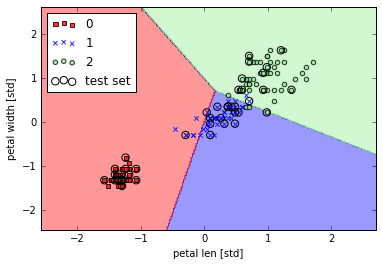

In [22]:
# plot
%matplotlib inline
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal len [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

In [23]:
# Petal width and length cannot properly separate with a linear 
# decision boundary